In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist 

In [3]:
EastWestAirlines = pd.read_excel("EastWestAirlines (1).xlsx", sheet_name= "data")
EastWestAirlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
EastWestAirlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### All numeircal variables or data points

# 1. Missing Values

In [5]:
EastWestAirlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### No missing values 

In [6]:
Airlines = EastWestAirlines.drop(["ID#"], axis = 1)
Airlines.head(5)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

# Numerical Vaiables 

In [7]:
numerical_features = [feature for feature in Airlines.columns if Airlines[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

Airlines[numerical_features].head()

Number of numerical variables:  11


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

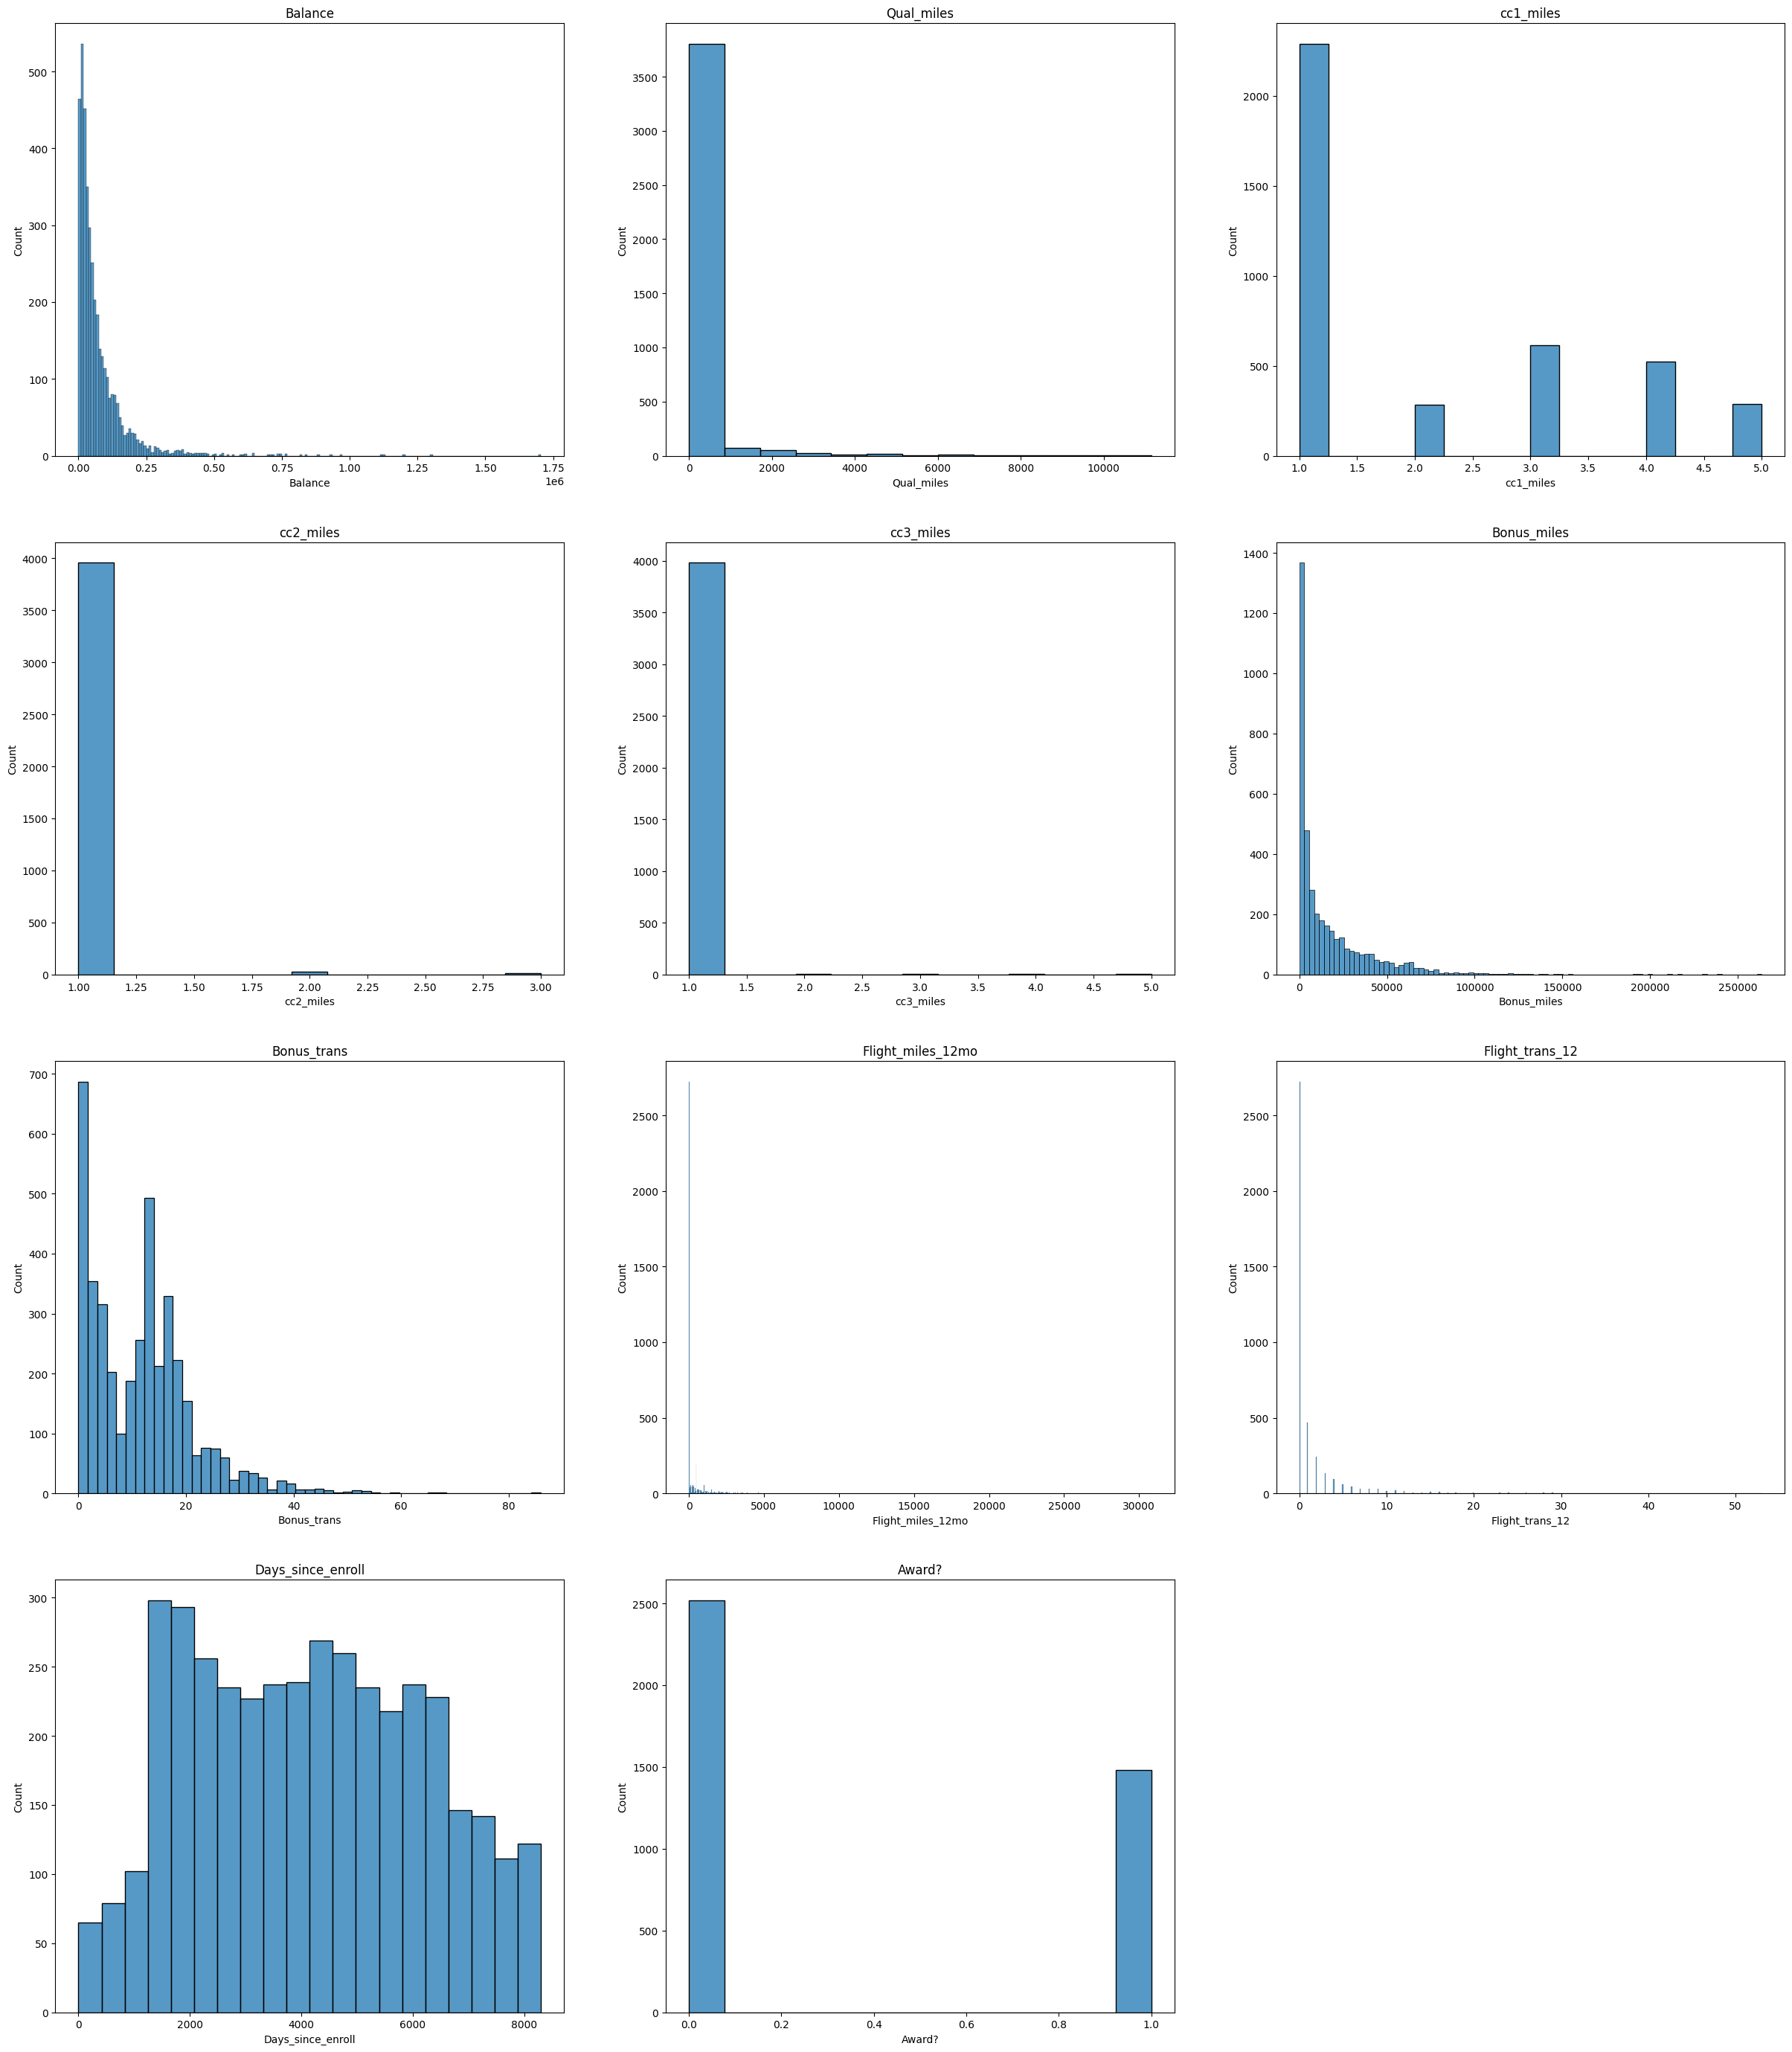

In [8]:
a = 9  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,80))

for i in numerical_features:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.histplot(data= Airlines, x= i)

    c = c + 1

plt.show()

# decreate values

In [9]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(Airlines[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [10]:
discrete_feature

['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']

# Continous Features

In [11]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 7


In [12]:
continuous_feature

['Balance',
 'Qual_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

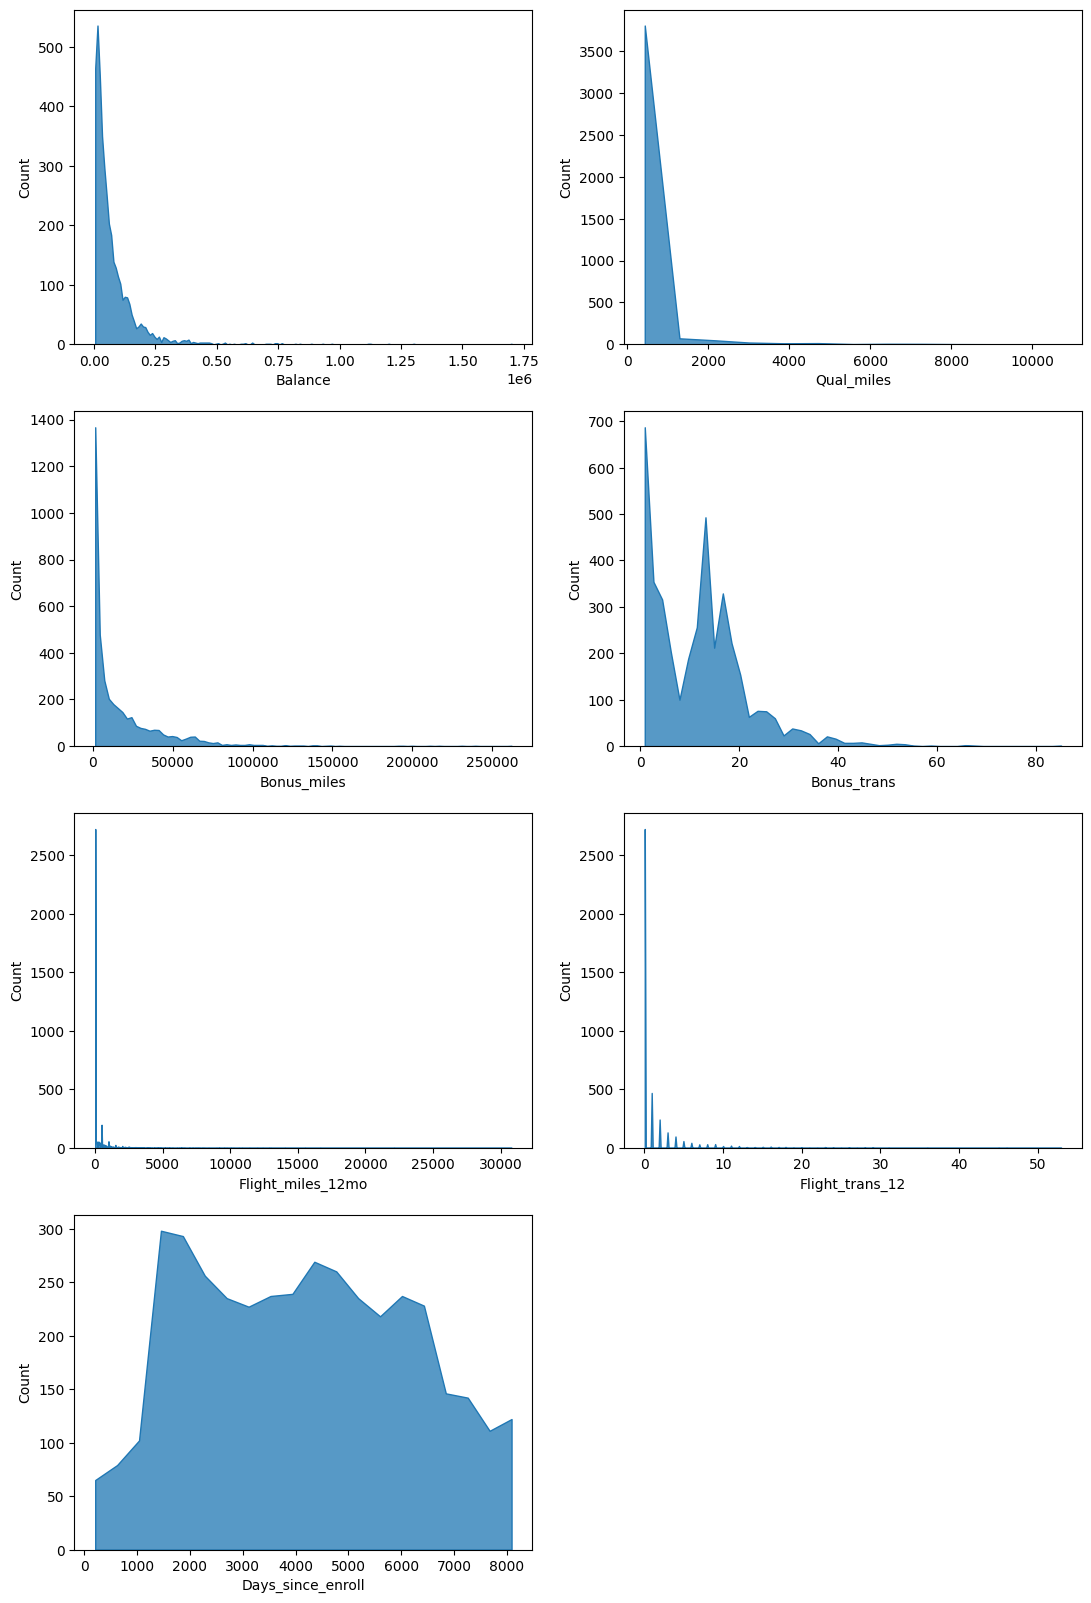

In [13]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i ,data= Airlines, element= "poly", palette="deep" )

    c = c + 1

plt.show()

# Checking for outliers 

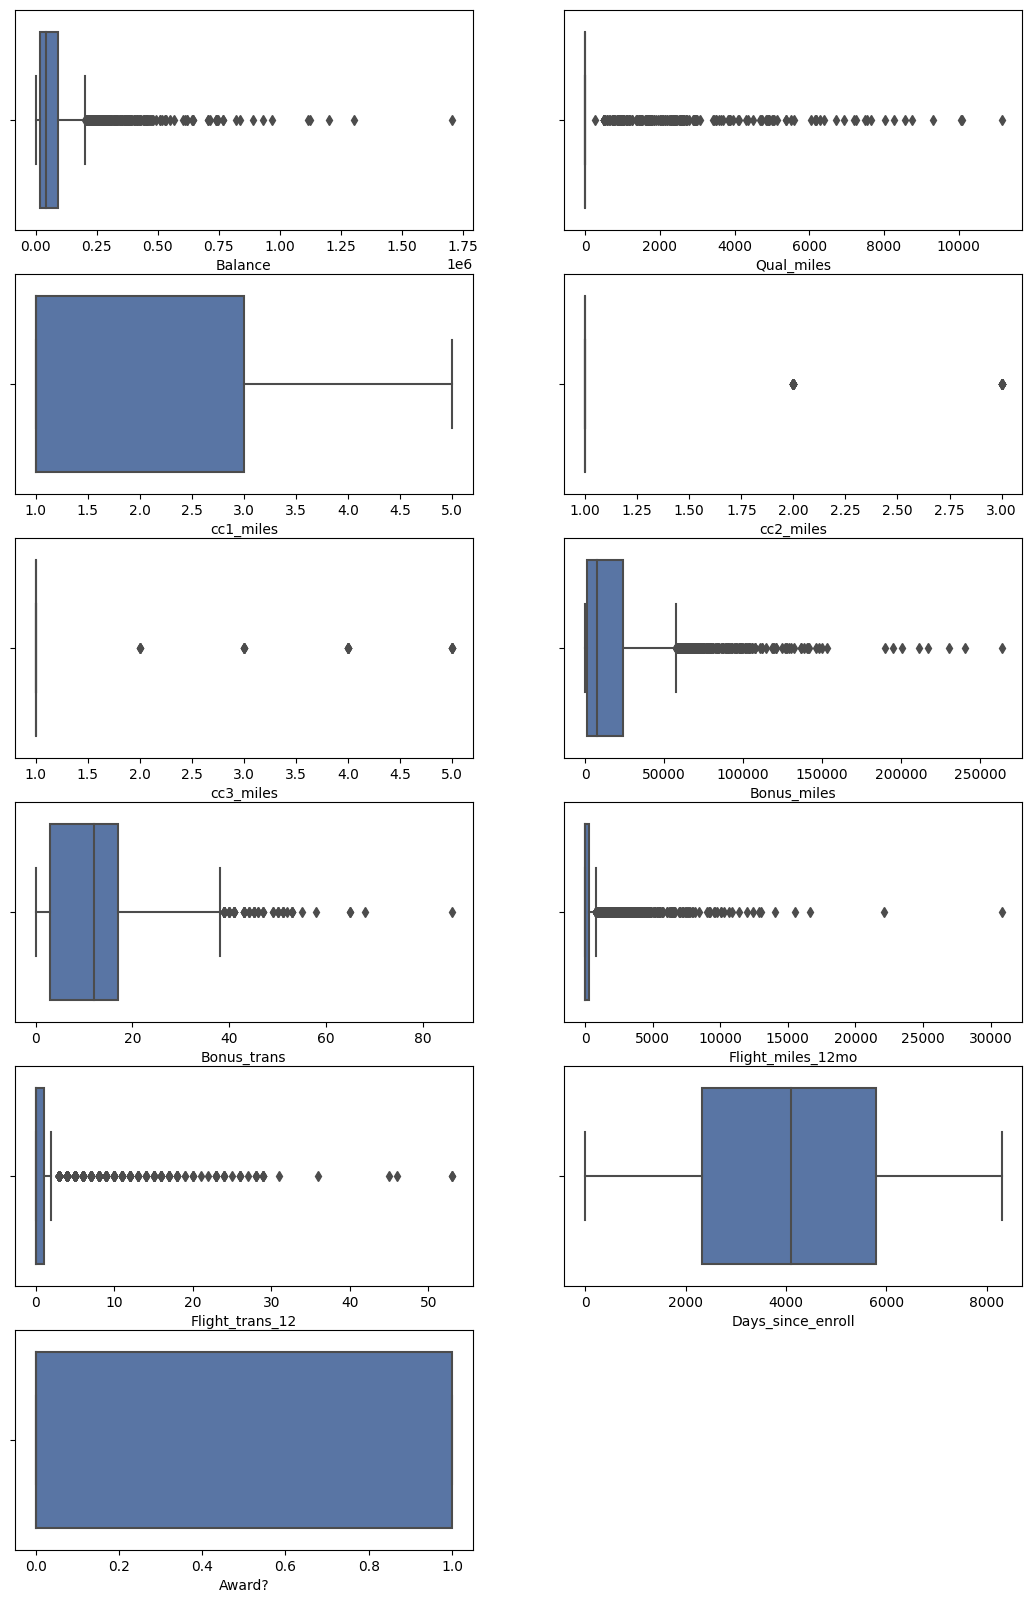

In [14]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in numerical_features:
    plt.subplot(a, b, c)

    sns.boxplot(x= i ,data= Airlines, palette="deep" )

    c = c + 1

plt.show()

# from above we can see there are number of ouliers in the dataset

In [15]:

for i in Airlines.columns:
    s = Airlines[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

1: 216498, 2037: 233656, 2049: 379744, 2070: 475338, 2131: 240007, 2132: 245021, 2136: 227776, 2140: 394999, 2145: 252741, 2168: 245045, 2172: 268314, 2177: 206155, 2214: 292023, 2230: 222312, 2252: 235312, 2288: 252520, 2343: 350608, 2378: 212029, 2403: 233449, 2422: 208825, 2428: 451294, 2472: 307149, 2489: 704113, 2500: 215155, 2512: 241165, 2526: 326704, 2531: 210491, 2564: 518960, 2587: 215946, 2591: 211773, 2608: 273442, 2621: 235422, 2656: 644881, 2673: 282784, 2696: 207311, 2709: 405499, 2722: 211355, 2724: 278258, 2751: 229576, 2754: 259529, 2760: 282971, 2839: 232194, 2879: 248738, 2938: 310226, 2954: 242018, 2984: 326201, 3037: 264735, 3040: 449205, 3070: 206287, 3098: 214674, 3137: 298505, 3235: 287033, 3247: 242062, 3315: 298927, 3322: 224852, 3417: 238446, 3754: 221543, 3756: 203353, 3772: 822321, 3788: 374613, 3839: 204693} 

column Qual_miles  {21: 2024, 24: 500, 45: 967, 70: 5031, 100: 1182, 106: 1182, 125: 500, 135: 1776, 177: 1745, 191: 733, 193: 2398, 207: 1250, 220

# Replacing outlier with upper and lower limit

In [16]:
for i in Airlines.columns:
    s = Airlines[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr

    Airlines[i] = pd.DataFrame(np.where(Airlines[i] > iqr_upper, iqr_upper, np.where(Airlines[i] <  iqr_lower,  iqr_lower, Airlines[i])))

## outliers Removed 

In [17]:
for i in Airlines.columns:
    s = Airlines[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

column Balance  {} 

column Qual_miles  {} 

column cc1_miles  {} 

column cc2_miles  {} 

column cc3_miles  {} 

column Bonus_miles  {} 

column Bonus_trans  {} 

column Flight_miles_12mo  {} 

column Flight_trans_12  {} 

column Days_since_enroll  {} 

column Award?  {} 



# K Mean Clustering 

In [18]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [19]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airlines.iloc[:, :])


In [20]:
df_norm.isna().sum() #missing values 

Balance                 0
Qual_miles           3999
cc1_miles               0
cc2_miles            3999
cc3_miles            3999
Bonus_miles             0
Bonus_trans             0
Flight_miles_12mo       0
Flight_trans_12         0
Days_since_enroll       0
Award?                  0
dtype: int64

In [21]:
columns_with_na = ["Qual_miles", "cc2_miles", "cc3_miles"]

for i in columns_with_na:
    df_norm = df_norm.drop([i], axis=1)


df_norm.isna().sum()

Balance              0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [22]:
###### scree plot or elbow curve ############
TWSS = []
k = [*range(2, 9)]

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

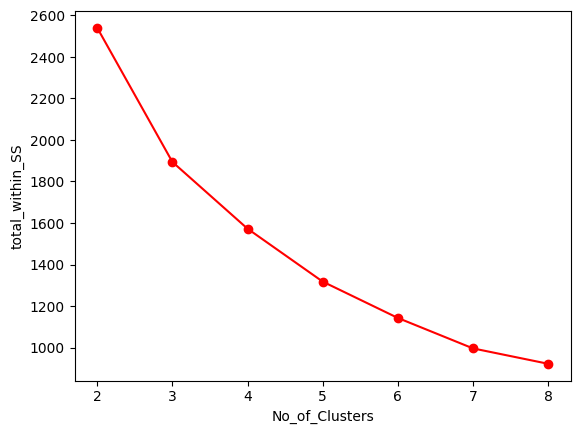

In [23]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

## Selecting 5 clusters from above graph

In [24]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [25]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Airlines['clust'] = mb # creating a  new column and assigning it to new column

In [26]:
Airlines.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  28143.0         0.0        1.0        1.0        1.0        174.0   
1  19244.0         0.0        1.0        1.0        1.0        215.0   
2  41354.0         0.0        1.0        1.0        1.0       4123.0   
3  14776.0         0.0        1.0        1.0        1.0        500.0   
4  97752.0         0.0        4.0        1.0        1.0      43300.0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0          1.0                0.0              0.0             7000.0     0.0   
1          2.0                0.0              0.0             6968.0     0.0   
2          4.0                0.0              0.0             7034.0     0.0   
3          1.0                0.0              0.0             6952.0     0.0   
4         26.0              777.5              2.5             6935.0     1.0   

   clust  
0      0  
1      0  
2      0  
3      0  
4      1

In [27]:
df_norm.head()

Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0  0.138486       0.00     0.003019     0.026316                0.0   
1  0.094696       0.00     0.003731     0.052632                0.0   
2  0.203495       0.00     0.071547     0.105263                0.0   
3  0.072710       0.00     0.008677     0.026316                0.0   
4  0.481019       0.75     0.751394     0.684211                1.0   

   Flight_trans_12  Days_since_enroll  Award?  
0              0.0           0.843742     0.0  
1              0.0           0.839884     0.0  
2              0.0           0.847842     0.0  
3              0.0           0.837955     0.0  
4              1.0           0.835905     1.0

In [28]:
Airlines.iloc[:, 2:8].groupby(Airlines.clust).mean()

cc1_miles  cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
clust                                                               
0       1.080474        1.0        1.0   2768.588272     5.814099   
1       4.065963        1.0        1.0  44589.595646    24.406332   
2       2.643692        1.0        1.0  21979.078855    13.136682   
3       1.152057        1.0        1.0   7585.855546    11.039356   
4       3.415282        1.0        1.0  28630.271595    16.420266   

       Flight_miles_12mo  
clust                     
0              22.540861  
1             643.302111  
2              26.414720  
3             671.954383  
4              56.256645

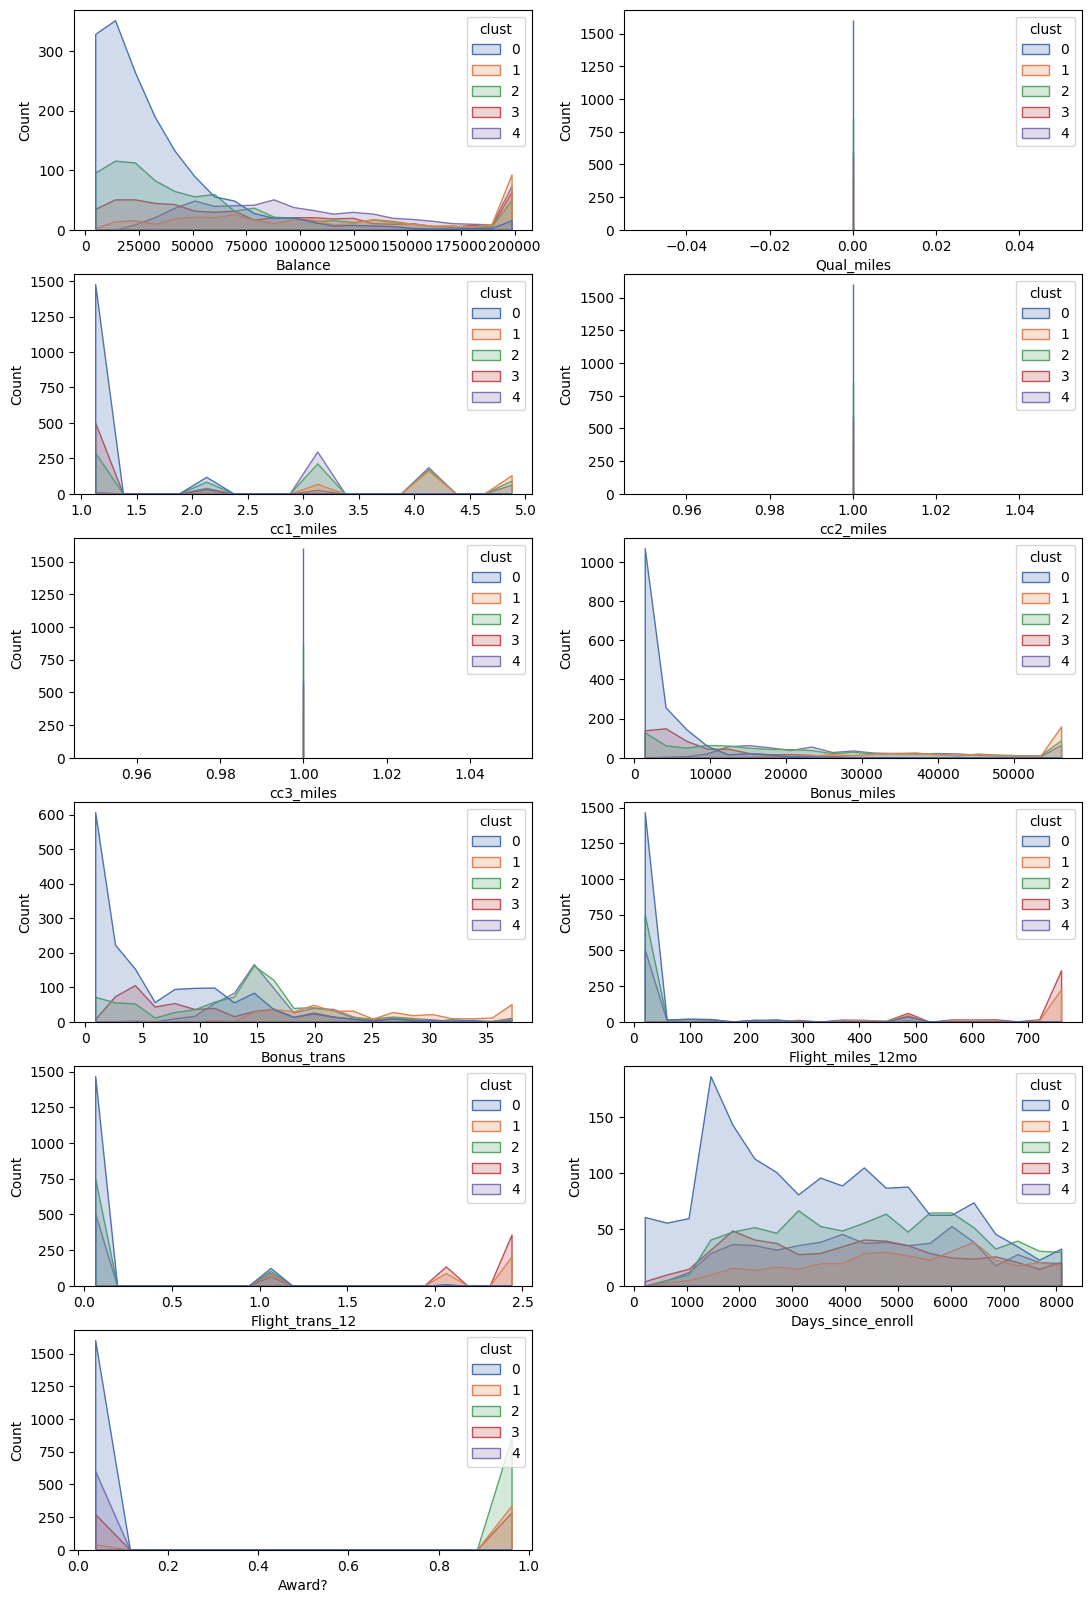

In [29]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in numerical_features:
    plt.subplot(a, b, c)

    sns.histplot(x= i,data= Airlines, hue= "clust",palette="deep", element= "poly" )

    c = c + 1

plt.show()

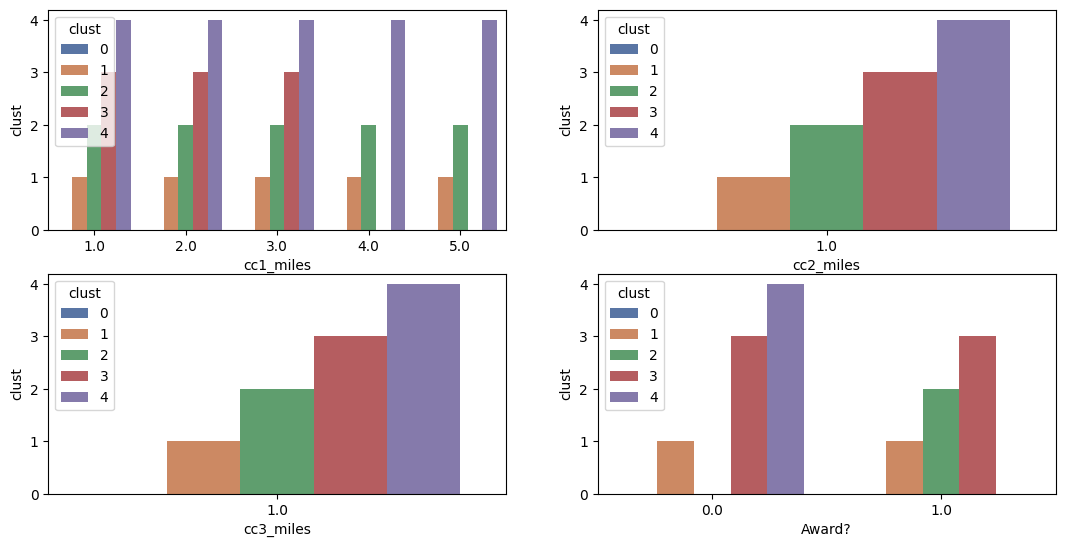

In [30]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in discrete_feature:
    plt.subplot(a, b, c)

    sns.barplot(x= i, y = "clust" ,data= Airlines, hue= "clust",palette="deep")

    c = c + 1

plt.show()

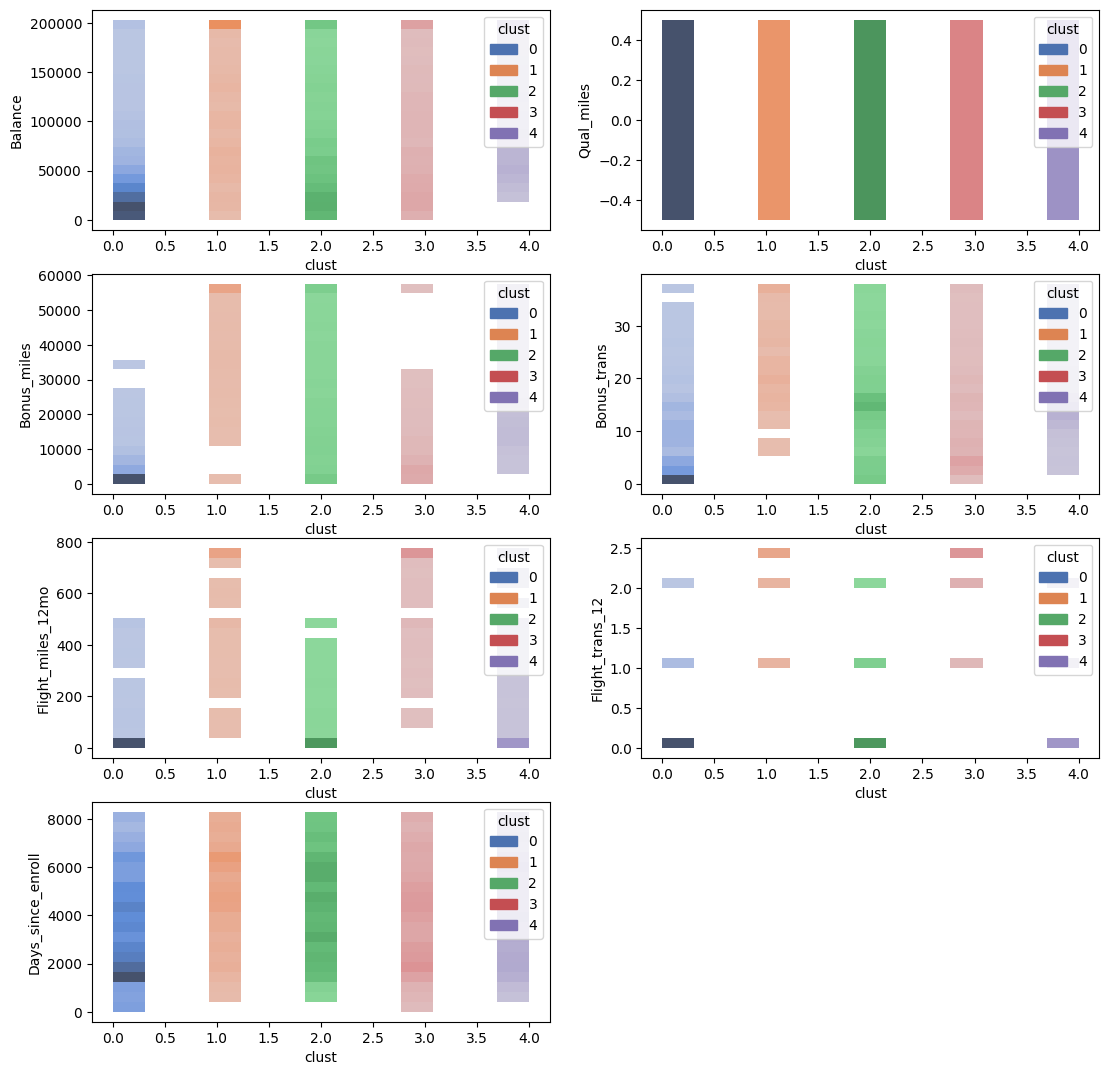

In [32]:
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= "clust" , y = i ,data= Airlines, hue= "clust",palette="deep")

    c = c + 1

plt.show()